# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

As a Data Scientist working for Airbnb, you have been tasked to create a model that
predicts Airbnb rental prices for the city of Amsterdam. Popularity for Airbnbs in
Amsterdam has grown over the past years and you are required to build a solution the
would make optimal predictions.

### b) Defining the Metric for Success

The metrics we will use to evaluate our model are RMSE and R2 scores.

### c) Understanding the Context 

Airbnb is an American vacation rental online marketplace company based in San
Francisco, California, United States. Airbnb offers arrangement for lodging, primarily
homestays, or tourism experiences. The company does not own any of the real estate
listings, nor does it host events; it acts as a broker, receiving commissions from each
booking.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [116]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [117]:
# loading and previewing dataset
df = pd.read_csv('listing_summary.csv')
df.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18639,41345471,An artistic jungle in the heart of the city,170022580,Irinna,NaN,Centrum-West,52.37453,4.89382,Entire home/apt,105,1,3,2020-03-15,0.95,1,7
4101,8303293,NaN,17531663,Jan-Erik,NaN,De Baarsjes - Oud-West,52.36526,4.86400,Entire home/apt,90,2,6,2015-10-19,0.11,1,0
13468,26160300,Spacious design loft on the canals in city centre,196626595,Laurine,NaN,Centrum-Oost,52.36203,4.90693,Entire home/apt,275,3,8,2019-08-14,0.38,1,25


In [118]:
# loading glossary
glossary = pd.read_csv('Glossary - Sheet1 (1).csv', header = None)
glossary

,0
0,room_id: A unique number identifying an Airbnb listing.
1,host_id: A unique number identifying an Airbnb host.
2,neighborhood: A subregion of the city or search area for which the survey is carried out. For some cities there is no neighbourhood information.
3,"room_type: One of “Entire home/apt”, “Private room”, or “Shared room”."
4,host_response_rate: The rate at which the particular host responds to the customers.
5,"price: The price (in $US) for a night stay. In early surveys, there may be some values that were recorded by month."
6,accomodates: The number of guests a listing can accommodate.
7,bathrooms: The number of bathrooms a listing offers.
8,bedrooms: The number of bedrooms a listing offers.
9,beds: The number of beds a listing offers.


In [119]:
# dropping the 'name' variable
df.drop(columns = ['name'], inplace = True)

In [120]:
# checking dataset shape
df.shape

(19362, 15)

In [121]:
# checking data types
df.dtypes

id                                  int64
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [122]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(19362, 15)

In [123]:
# checking for missing data
df.isna().sum()

id                                    0
host_id                               0
host_name                             4
neighbourhood_group               19362
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2284
reviews_per_month                  2284
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [124]:
# dropping the 'neighbourhood_group' variable, and the records with missing values for 'last_review'
# and 'reviews_per_month'
df.drop(columns = ['neighbourhood_group'], inplace = True)
df.dropna(inplace = True)

# confirming we have no null values
df.isnull().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [125]:
df.shape

(17075, 14)

In [126]:
# get the unique value of each variable to ensure there are no anomalies
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique variables:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: id
Number of unique variables: 17075
[    2818    20168    25428 ... 42947577 43031829 43076538]

Variable: host_id
Number of unique variables: 15182
[     3159     59484     56142 ... 341432744 148433830 342882021]

Variable: host_name
Number of unique variables: 5382
['Daniel' 'Alexander' 'Joan' ... 'The Niu Fender' 'Marcela' 'Addie']

Variable: neighbourhood
Number of unique variables: 22
['Oostelijk Havengebied - Indische Buurt' 'Centrum-Oost' 'Centrum-West'
 'Zuid' 'De Pijp - Rivierenbuurt' 'De Baarsjes - Oud-West' 'Bos en Lommer'
 'Westerpark' 'Oud-Oost' 'Noord-West' 'Slotervaart' 'Oud-Noord'
 'Geuzenveld - Slotermeer' 'Watergraafsmeer' 'IJburg - Zeeburgereiland'
 'Noord-Oost' 'Gaasperdam - Driemond' 'Buitenveldert - Zuidas'
 'Bijlmer-Oost' 'De Aker - Nieuw Sloten' 'Osdorp' 'Bijlmer-Centrum']

Variable: latitude
Number of unique variables: 5720
[52.36575 52.36509 52.37297 ... 52.40828 52.40598 52.38885]

Variable: longitude
Number of unique variables: 9193
[4.94142 4.89

## CHECKING FOR OUTLIERS

In [127]:
# drop id as its not needed
df.drop(columns = ['id'], inplace = True)

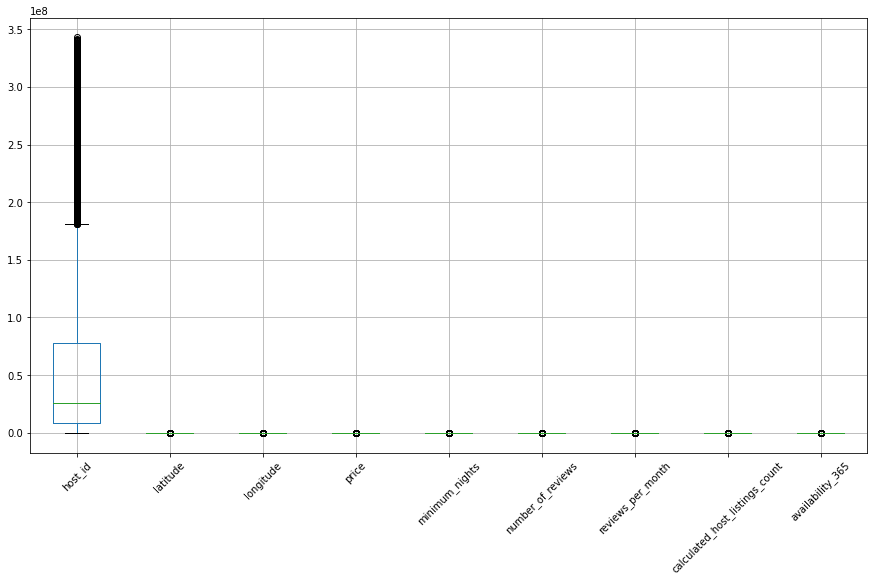

In [128]:
# visualizing the distribution of outliers
plt.figure(figsize = (15, 8))
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [129]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(8544, 13)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9795,25931366,Tuğba,Osdorp,52.35592,4.79562,Entire home/apt,120,1,11,2020-03-14,0.50,1,117
15801,202021636,Laura,De Baarsjes - Oud-West,52.36873,4.84887,Entire home/apt,120,3,3,2019-08-25,0.34,1,0
18299,1917728,Victor,Centrum-West,52.37317,4.88252,Entire home/apt,145,2,6,2020-03-08,1.67,1,310


In [130]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

50.04

50.04% is a fairly large number of records to drop, so we will not drop our outliers.

It would be tricky to drop the records with outliers since that will reduce our dataset by half so we will leave them there. However, we will drop the host_id variable later on, right before modeling.

##Checking Linearity

In [131]:
numerical_train = df.select_dtypes(include = ['int','float'])
numerical_train.head(2)

null_series = numerical_train.isnull().sum()
print(null_series.shape)

full_cols_series = null_series[null_series == 0]
print(full_cols_series.shape)

(9,)
(9,)


##Checking multicollinearity

In [132]:
# create list to store column names to test against 'price'
train_subset = df[full_cols_series.index]

corr = train_subset.corr()

SalePrice_corr = corr ['price']
SalePrice_corr

# '''
# Select just the Price column from the resulting data frame, compute the absolute value of each term, 
# sort the resulting Series by the correlation values, and assign to sorted_corrs.
# '''

ab = SalePrice_corr.abs()

sorted_corrs = ab.sort_values(ascending=False)
print(sorted_corrs)

price                             1.000000
availability_365                  0.132741
minimum_nights                    0.035343
calculated_host_listings_count    0.025464
number_of_reviews                 0.024397
latitude                          0.019567
host_id                           0.019220
reviews_per_month                 0.015244
longitude                         0.013304
Name: price, dtype: float64


There is a poor relationship between price and the rest of the features of less than 0.75

In [133]:
# checking the correlations between the numerical variables
cor = df.corr()
cor

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,-0.011259,0.027041,0.019220,-0.012490,-0.107797,0.126118,0.024235,0.102491
latitude,-0.011259,1.000000,-0.143365,0.019567,-0.017351,0.036669,0.030088,0.022713,0.040589
longitude,0.027041,-0.143365,1.000000,0.013304,-0.002961,0.003264,0.012546,0.012186,0.021006
price,0.019220,0.019567,0.013304,1.000000,0.035343,-0.024397,-0.015244,0.025464,0.132741
minimum_nights,-0.012490,-0.017351,-0.002961,0.035343,1.000000,-0.017258,-0.024594,-0.007350,0.041135
number_of_reviews,-0.107797,0.036669,0.003264,-0.024397,-0.017258,1.000000,0.738433,0.002123,0.306629
reviews_per_month,0.126118,0.030088,0.012546,-0.015244,-0.024594,0.738433,1.000000,0.039661,0.325249
calculated_host_listings_count,0.024235,0.022713,0.012186,0.025464,-0.007350,0.002123,0.039661,1.000000,0.126483
availability_365,0.102491,0.040589,0.021006,0.132741,0.041135,0.306629,0.325249,0.126483,1.000000


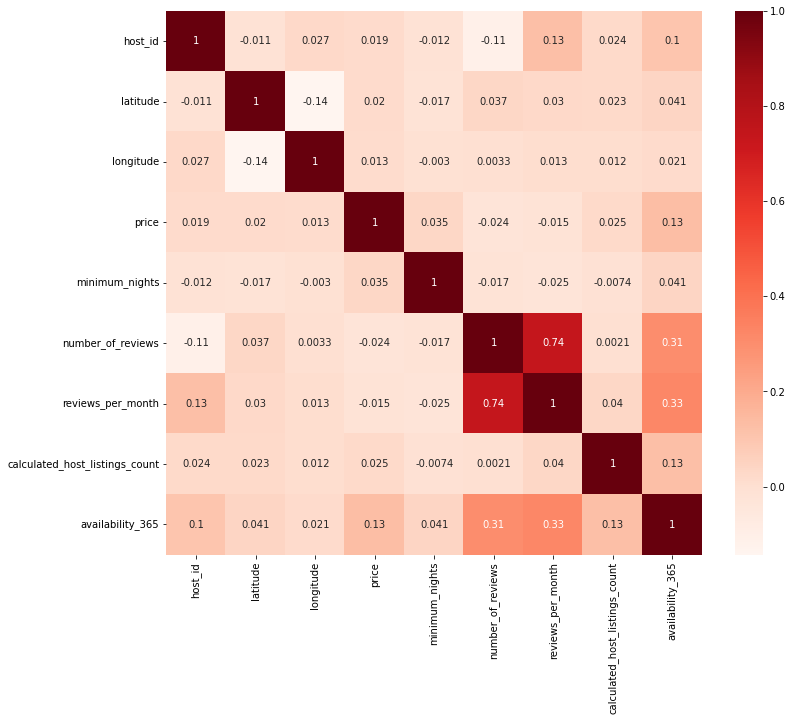

In [134]:
# plotting the correlations onto a heatmap
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Reviews per month and number of reviews are strongly correlated hence will drop reviews per month.

The rest of the variables are not strongly correlated hence i will not drop any other columns

In [135]:
df.drop(columns = ['reviews_per_month'], inplace = True)

In [136]:
df.shape

(17075, 12)

# <font color='#2F4F4F'>3. Data Analysis</font>

## 3.1 Univariate Analysis 

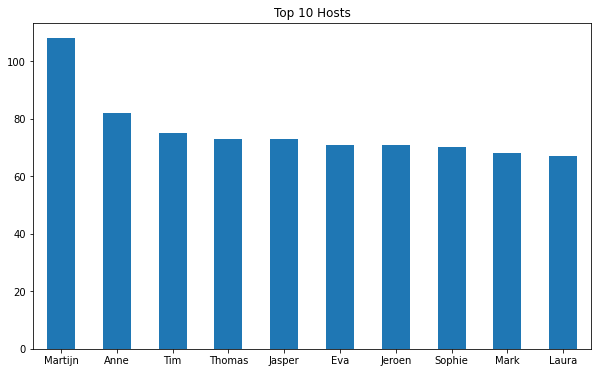

In [137]:
# getting the top 10 most common hosts
plt.figure(figsize = (10, 6))
df.host_name.value_counts()[:10].plot(kind = 'bar', rot = 0)
plt.title("Top 10 Hosts")
plt.show()

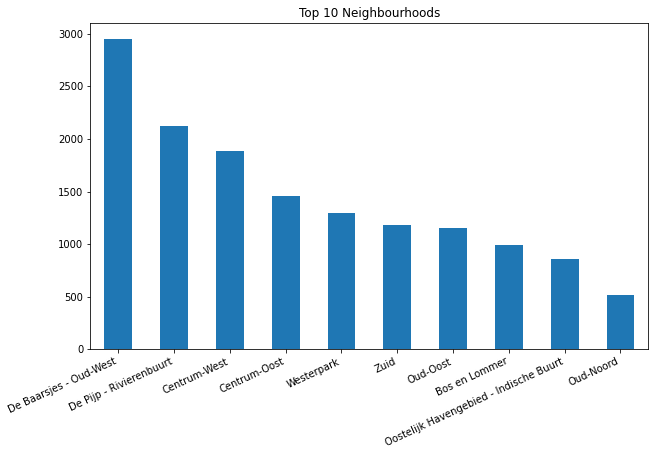

In [138]:
# getting the top 10 most common neighbourhoods
plt.figure(figsize = (10, 6))
df.neighbourhood.value_counts()[:10].plot(kind = 'bar', rot = 25)
plt.xticks(ha = "right")
plt.title("Top 10 Neighbourhoods")
plt.show()

In [139]:
df.room_type.value_counts()

Entire home/apt    13308
Private room        3497
Hotel room           232
Shared room           38
Name: room_type, dtype: int64

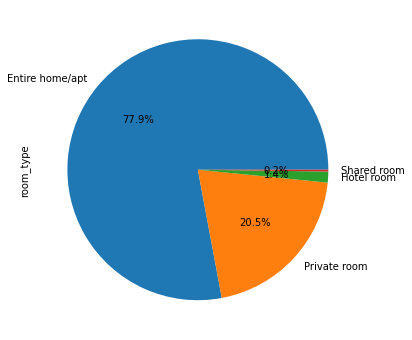

In [140]:
# getting the most common room types
plt.figure(figsize = (6, 6))
labels = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
df.room_type.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', labels = labels)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


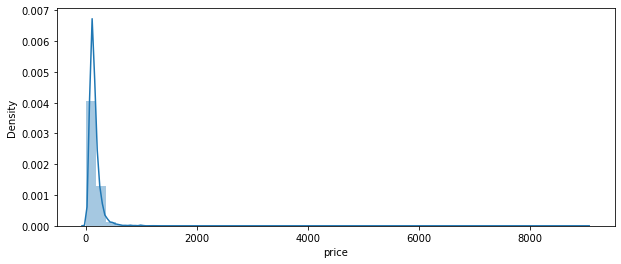

In [141]:
# distribution of price
plt.figure(figsize = (10,4))
sns.distplot(df['price'])
plt.show()

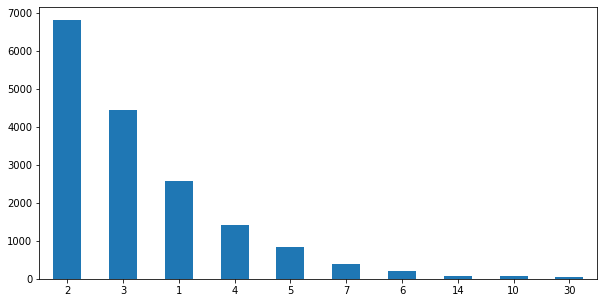

In [142]:
# getting the top 10 most common minimum number of nights to spend
plt.figure(figsize = (10, 5))
df.minimum_nights.value_counts()[:10].plot(kind = 'bar', rot = 0)
plt.show()

## 3.2 Bivariate Analysis

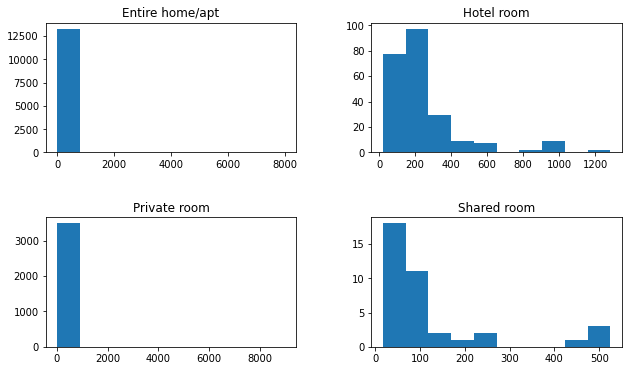

In [143]:
# price by room type
df.hist('price', by = 'room_type', rot = 0, figsize = (10, 6))
plt.show()

In [144]:
df.shape

(17075, 12)

In [145]:
# average price by neighbourhood
df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)

neighbourhood
Centrum-West                              203.653397
Centrum-Oost                              190.534247
Zuid                                      178.813243
Oud-Noord                                 168.763566
De Pijp - Rivierenbuurt                   166.601787
IJburg - Zeeburgereiland                  157.723077
Westerpark                                151.241140
De Baarsjes - Oud-West                    149.376228
Oud-Oost                                  144.606957
Watergraafsmeer                           141.199125
Buitenveldert - Zuidas                    137.690355
Oostelijk Havengebied - Indische Buurt    135.101163
Noord-Oost                                130.495833
Noord-West                                126.318885
Bos en Lommer                             122.525304
De Aker - Nieuw Sloten                    121.268908
Slotervaart                               119.791549
Geuzenveld - Slotermeer                   113.937143
Osdorp                          

In [146]:
# average price by neighbourhood
df.groupby('minimum_nights')['price'].mean().sort_values(ascending = False)

minimum_nights
365     3000.000000
99       999.000000
200      999.000000
52       429.000000
30       331.551020
222      300.000000
27       275.000000
48       250.000000
31       243.750000
150      203.000000
21       201.761905
15       197.888889
1000     185.000000
240      180.000000
28       175.900000
7        174.760526
300      170.500000
180      169.250000
3        166.936544
14       163.476923
38       159.000000
4        158.828311
45       157.500000
5        155.676190
1        154.149670
60       152.071429
2        151.557365
24       150.000000
22       150.000000
6        146.276923
59       146.250000
40       139.000000
9        136.250000
41       131.000000
20       130.185185
1001     130.000000
16       129.666667
100      127.000000
90       126.250000
10       125.709677
18       125.000000
8        120.730769
29       120.000000
999      120.000000
25       118.555556
12       118.083333
500      110.000000
50       110.000000
17       109.500000
95   

## 3.3 Feature Engineering

In [147]:
# getting the average price per room type

avg_price_per_room = df.groupby('room_type')['price'].mean().to_dict()

# adding to our dataset
df['avg_price_per_room'] = df['room_type'].map(avg_price_per_room)

# previewing our modified dataset

df.head()

,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,avg_price_per_room
0,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1,169,109.421504
1,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2,106,109.421504
2,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,1,132,169.179967
3,97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,1,172,109.421504
4,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,3,210,109.421504


In [148]:
# getting the average price per neighbourhood

avg_price_per_neighbourhood = df.groupby('neighbourhood').price.transform('mean')

# adding to our dataset

df['avg_price_per_neighbourhood'] = avg_price_per_neighbourhood

# previewing our modified dataset

df.head()

,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,avg_price_per_room,avg_price_per_neighbourhood
0,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1,169,109.421504,135.101163
1,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2,106,109.421504,190.534247
2,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,1,132,169.179967,203.653397
3,97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,1,172,109.421504,203.653397
4,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,3,210,109.421504,203.653397


In [149]:
# assign the numbers based on the average values
room_type_map = {'Private room':1,'Shared room':2,'Entire home/apt':3,'Hotel room':4}

# create a new column in the dataframe
df['room_type_encode'] = df['room_type'].map(room_type_map)
df.head()

,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,avg_price_per_room,avg_price_per_neighbourhood,room_type_encode
0,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1,169,109.421504,135.101163,1
1,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2,106,109.421504,190.534247,1
2,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,1,132,169.179967,203.653397,3
3,97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,1,172,109.421504,203.653397,1
4,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,3,210,109.421504,203.653397,1


In [150]:
df.shape

(17075, 15)

In [151]:
# dropping columns not required in preparation for modeling

df.drop(columns=['host_id','host_name','neighbourhood','room_type','last_review'],inplace=True)
print(df.shape)
df.head(3)


(17075, 10)


,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,avg_price_per_room,avg_price_per_neighbourhood,room_type_encode
0,52.36575,4.94142,59,3,278,1,169,109.421504,135.101163,1
1,52.36509,4.89354,100,1,340,2,106,109.421504,190.534247,1
2,52.37297,4.88339,125,14,5,1,132,169.179967,203.653397,3


# <font color='#2F4F4F'>4. Data Modeling</font>

In [152]:
# split into features (X) and label (Y)


X = df.drop(['price'], axis=1)  #Independent/predictor variables
y = df['price']  # Dependent/label variable



In [153]:
# split into 70-30 train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


#confirm size of datasets
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17075, 10)
(11952, 9)
(5123, 9)
(11952,)
(5123,)


In [154]:
# scaling our features


from sklearn.preprocessing import MinMaxScaler  
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)


For purposes of simplicity, we will work with the following regressors:
* Decision Tree Regressor
* Random Forest Regressor

## 4.1 Normal Modeling

In [159]:
# loading our regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# import the scoring metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# instantiating our regressors

decision_classifier = DecisionTreeRegressor(random_state=1)
random_forest = RandomForestRegressor(random_state=1)


# fitting to our training data
decision_classifier.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# making predictions
decision_y_prediction = decision_classifier.predict(X_test)
random_forest_prediction = random_forest.predict(X_test)

# evaluating the RMSE score

decision_classifier_rmse = np.sqrt(mean_squared_error(y_test,decision_y_prediction))
random_forest_rmse = np.sqrt(mean_squared_error(y_test,random_forest_prediction))
print('Decision Tree RMSE:', decision_classifier_rmse)
print('Random Forest RMSE:', random_forest_rmse)


# evaluating the R2 scores

decision_classifier_R2 = r2_score(y_test,decision_y_prediction)
random_forest_R2 = r2_score(y_test,random_forest_prediction)
print('Decision Tree R2_SCORE:', decision_classifier_R2)
print('Random Forest R2_SCORE:', random_forest_R2)



Decision Tree RMSE: 170.6556136596469
Random Forest RMSE: 105.06426156327947
Decision Tree R2_SCORE: -2.0016927984924386
Random Forest R2_SCORE: -0.13771926107192134


R2 score is far from 1 hence this models need improvement.

Random forest has a lower RMSE hence a better fit than decision tree model.

In [158]:
# 10% of target variable's mean
mean_price = y.mean()
mean_price * 0.1

15.788029282576867

Record your observations.

Both models give an RMSE that is lower than 10% of the mean price indicating lower accuracy

## 4.2 Modeling with Grid Search

In [161]:
from sklearn.model_selection import GridSearchCV
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# grid parameters for decision trees
dt_grid_param = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

# grid parameters for random forest
rf_grid_param = {
    'max_depth': [10, 20, 30, 40, 50,None],
    "n_estimators": [10, 20, 30, 40, 50],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}
# setting up the Grid Search with our regressors with cv = 5 and n_jobs = -1

# decision tree Grid Search
gd_sr_dt = GridSearchCV(estimator = dt_model,
                     param_grid = dt_grid_param,
                     scoring = ['neg_root_mean_squared_error','r2'],
                     cv = 5,
                     refit = 'neg_root_mean_squared_error',
                     verbose = 2,
                     n_jobs =-1)
# Random forest Grid Search
gd_sr_rf = GridSearchCV(estimator = rf_model,
                     param_grid = rf_grid_param,
                     scoring = ['neg_root_mean_squared_error','r2'],
                     cv = 5,
                     refit = 'neg_root_mean_squared_error',
                     verbose = 2,
                     n_jobs =-1)
# fitting to training data

gd_sr_dt.fit(X_train, y_train)
gd_sr_rf.fit(X_train, y_train)

# getting the best parameters

best_parameters_dt = gd_sr_dt.best_params_
best_parameters_rf = gd_sr_rf.best_params_
print('Decision Tree Best Parameters')
print(best_parameters_dt)
print('Random Forest Best Parameters')
print(best_parameters_rf)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Decision Tree Best Parameters
{'max_depth': 10, 'min_samples_leaf': 50}
Random Forest Best Parameters
{'max_depth': 20, 'min_samples_leaf': 40, 'n_estimators': 50}


In [162]:
# get the score for decision tree
best_result_dt = gd_sr_dt.best_score_
print(best_result_dt)

-159.98163176148478


The RMSE from decision tree reduced from 170.6 to 159.98 after tuning using Grid Search model.

In [163]:
# get the score for random forest
best_result_rf = gd_sr_rf.best_score_
print(best_result_rf)

-156.43186827388615


Random forest RMSE increased slightly from 105.06 to 156.43 after Grid search tuning, however random forest remaining the better model



In [164]:
# implementing this recommendation

# instantiating our regressors with the recommended parameters

dt_model = DecisionTreeRegressor(random_state=1,max_depth=10, min_samples_leaf=40)
rf_model = RandomForestRegressor(random_state=1,max_depth=20, min_samples_leaf=50, n_estimators=20)

# fitting to our training data

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# making predictions

dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# evaluating the RMSE and R2 scores

# calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print('Decision Tree RMSE:', dt_rmse)
print('Random Forest RMSE:', rf_rmse)

# calculate R2 Score
dt_r2 = r2_score(y_test,dt_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('Decision Tree R2 Score:', dt_r2)
print('Random Forest R2 Score:', rf_r2)

Decision Tree RMSE: 97.71283370810546
Random Forest RMSE: 90.1975646447958
Decision Tree R2 Score: 0.01592476639742557
Random Forest R2 Score: 0.1614775222874827


The RMSE from decision tree reduced from 170.65 to 97.71 after using the the best parameters from the Grid search tuning

Random forest RMSE reduced from 105.06 to 90.19 after using the the best parameters from the Grid search tuning



## 4.3 Modeling with Random Search

In [165]:
# setting up our parameters and the respective distributions to sample from
# YOUR CODE HERE
from scipy.stats import randint as sp_randint
# grid parameters for decision trees
dt_random_param = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_leaf': sp_randint(1, 50)
}
# grid parameters for random forest
rf_random_param = {
    'max_depth': [10, 20, 30, 40, 50,None],
    "n_estimators": sp_randint(1, 50),
    'min_samples_leaf': sp_randint(1, 50)
}

# setting up Randomized Search for each regressor   with cv = 5
# YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV 
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

random_dt = RandomizedSearchCV(dt_model, 
                               dt_random_param, 
                               cv = 5,
                               scoring = ['neg_root_mean_squared_error','r2'],
                               refit = 'neg_root_mean_squared_error',
                               n_jobs=-1,
                               random_state=1
                               )
random_rf = RandomizedSearchCV(rf_model,                                
                               rf_random_param, 
                               cv = 5,
                               scoring = ['neg_root_mean_squared_error','r2'],
                               refit = 'neg_root_mean_squared_error',
                               n_jobs=-1,
                               random_state=1
                               )

# fitting to training data
# YOUR CODE HERE
random_dt.fit(X_train, y_train)
random_rf.fit(X_train, y_train)

# getting the best parameters
# YOUR CODE HERE
best_parameters_dt = random_dt.best_params_
print('Decision Tree Best Parameters (Random Search): ',best_parameters_dt)

best_parameters_rf = random_rf.best_params_
print('Random Forest Best Parameters (Random Search): ',best_parameters_rf)

# And lastly obtaining our accuracy
best_result_dt = random_dt.best_score_
print('Decision Tree Accuracy (Random Search): ',best_result_dt)

best_result_rf = random_rf.best_score_
print('Random Forest Accuracy (Random Search): ',best_result_rf)

Decision Tree Best Parameters (Random Search):  {'max_depth': None, 'min_samples_leaf': 44}
Random Forest Best Parameters (Random Search):  {'max_depth': None, 'min_samples_leaf': 44, 'n_estimators': 13}
Decision Tree Accuracy (Random Search):  -160.788781685421
Random Forest Accuracy (Random Search):  -156.50831615915553


The RMSE from decision tree increased from 170.65 to -160.78 after tuning using Random Search

Random forest RMSE increased from 105.06 to 156.50 after tuning using Random Search

In [166]:
# implementing this recommendation

# instantiating our regressors with the recommended parameters

dt_model = DecisionTreeRegressor(random_state=1,max_depth=None, min_samples_leaf=44)
rf_model = RandomForestRegressor(random_state=1,max_depth=50, min_samples_leaf=43, n_estimators=29)

# fitting to our training data

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# making predictions

dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# evaluating the RMSE and R2 scores

# calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print('Decision Tree RMSE after Random Search:', dt_rmse)
print('Random Forest RMSE after Random Search:', rf_rmse)

# calculate R2 Score
dt_r2 = r2_score(y_test,dt_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('Decision Tree R2 Score after Random Search:', dt_r2)
print('Random Forest R2 Score after Random Search:', rf_r2)

Decision Tree RMSE after Random Search: 97.41828075462428
Random Forest RMSE after Random Search: 90.09191877853006
Decision Tree R2 Score after Random Search: 0.021848765613421417
Random Forest R2 Score after Random Search: 0.16344064744486342


The RMSE from decision tree reduced from 170.65 to 97.41 after using the the best parameters from the Random search tuning.

Random forest RMSE reduced from 105.06 to 90.09 after using the the best parameters from the Random search tuning.


## 4.4 Modeling with Bayesian Optimization

In [167]:
# importing the hyperopt library and cross_val_score
# YOUR CODE HERE
from hyperopt import hp, fmin, tpe, STATUS_OK

# setting up a space dictionary
# YOUR CODE HERE
dt_space = {'max_depth': hp.quniform('max_depth', 10, 1200, 10), 
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5)}
def dt_objective(space): 
    model = DecisionTreeRegressor(max_depth = space['max_depth'],
                                 min_samples_leaf = space['min_samples_leaf'])
    # print(classifier)
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_pred=y_pred))
    # We aim to maximize accuracy; in this case we return it as a negative value
    return {'loss': -rmse, 'status': STATUS_OK }

# 3. Running our bayesian optimizer
# ---
#
best_dt = fmin(fn= dt_objective,                        # the objective function to miminize / the loss function to minimize
            space = dt_space,                        # the range of input values to test during optimisation
            algo= tpe.suggest,                    # the search algorithm to use
            max_evals = 80,                       # the no. of iteration to perform
            rstate=np.random.RandomState(42))     # the randomstate for reproducability / to get the same result when we run the code

# printing out our outcome
best_dt

100%|██████████| 80/80 [00:02<00:00, 37.01it/s, best loss: -114.07946702573946]


{'max_depth': 1020.0, 'min_samples_leaf': 0.00036131692431207933}

In [168]:
# importing the hyperopt library and cross_val_score
# YOUR CODE HERE
from hyperopt import hp, fmin, tpe, STATUS_OK

# setting up a space dictionary
# YOUR CODE HERE
rf_space = {'max_depth': hp.quniform('max_depth', 10, 1200, 10), 
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        "n_estimators": hp.choice ('n_estimators', range(10,1200))
        }
def rf_objective(space): 
    model = RandomForestRegressor(max_depth = space['max_depth'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                  n_estimators = space['n_estimators'])
    # print(classifier)
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_pred=y_pred))
    # We aim to maximize accuracy; in this case we return it as a negative value
    return {'loss': -rmse, 'status': STATUS_OK }

# 3. Running our bayesian optimizer
# ---
#
best_rf = fmin(fn= rf_objective,                        # the objective function to miminize / the loss function to minimize
            space = rf_space,                        # the range of input values to test during optimisation
            algo= tpe.suggest,                    # the search algorithm to use
            max_evals = 80,                       # the no. of iteration to perform
            rstate=np.random.RandomState(42))     # the randomstate for reproducability / to get the same result when we run the code

# printing out our outcome
best_rf

100%|██████████| 80/80 [02:55<00:00,  2.20s/it, best loss: -98.63495217723357]


{'max_depth': 550.0,
 'min_samples_leaf': 0.4441137024756094,
 'n_estimators': 177}

In [169]:
# implementing this recommendation

# instantiating our regressors with the recommended parameters
# YOUR CODE HERE
dt_model = DecisionTreeRegressor(random_state=1,max_depth=370, min_samples_leaf=0.50)
rf_model = RandomForestRegressor(random_state=1,max_depth=650, min_samples_leaf=0.33, n_estimators=123)

# fitting to our training data
# YOUR CODE HERE
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# making predictions
# YOUR CODE HERE
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# evaluating the RMSE and R2 scores
# YOUR CODE HERE
# calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print('Decision Tree RMSE after Bayesian Optimization:', dt_rmse)
print('Random Forest RMSE after Bayesian Optimization:', rf_rmse)

# calculate R2 Score
dt_r2 = r2_score(y_test,dt_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('Decision Tree R2 Score after Bayesian Optimization:', dt_r2)
print('Random Forest R2 Score after Bayesian Optimization:', rf_r2)

Decision Tree RMSE after Bayesian Optimization: 98.67087455544596
Random Forest RMSE after Bayesian Optimization: 98.61242362028145
Decision Tree R2 Score after Bayesian Optimization: -0.003466874864634484
Random Forest R2 Score after Bayesian Optimization: -0.0022783538381485613


The RMSE from decision tree reduced from 170.655 to 98.67 after using the the best parameters from the Bayesian Optimization

Random forest RMSE increased from 105.06 to 98.61 after using the the best parameters from the Bayesian Optimization



# <font color='#2F4F4F'>5. Summary of Findings</font>

Summarize your findings.

Our best model is Random Forest that has been optimized using Random Search with an RMSE of 90.09

# <font color='#2F4F4F'>6. Recommendations</font>

Provide your recommendations.

The Airbnb should use random forest predictions to predict rental prices

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question? 
yes, we have the right question


### b) Did we have the right data? 
yes we got the right data


### c) What can be done to improve the solution?
More hyperparameter tuning or use other regression analysis models.